You can perform PID on MI(r;(x,v)), and compare the result of different 'x'.<br>
'x' can from experimental data or produce in this code for different Tau (Gramma) or cutoff frequency.<br>
'r' can be real responses of RGC or from NGD or from x+$\Delta$*v.<br>
Using 20200408 Chou's data, unit2.<br>

# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
from scipy.optimize import curve_fit
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


# Load Experimental data

In [3]:
filenames = ['D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\20200408_cSTA_sort_unit2']
dt = 0.01
x_list, T_list, rstate_list = expSnR(filenames, dt, 'LED', [41])
i = 0
rstate = rstate_list[i][41-1,:]
x = x_list[i]

cSTA = np.correlate(x , rstate, 'same')/ np.correlate(np.ones_like(x ), rstate, 'same')
cSTA = cSTA[int(len(cSTA)/2):int(len(cSTA)/2-1/dt):-1]

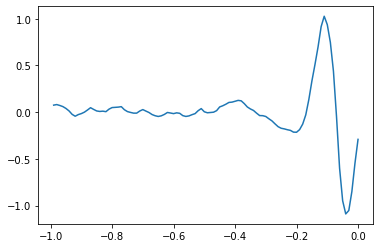

In [4]:
taxis = -np.arange(len(cSTA))*dt
plt.plot(taxis, cSTA)

In [5]:
# plt.plot(taxis, cSTA)
# plt.plot(taxis, cSTA1)

In [6]:
def NGDcSTA(x, alpha, beta, Kg, tau_y, Amp):

    stimulus = x.copy()
    T = np.arange(0,int(tau_y/dt*8))*dt
    Ky=T/tau_y /tau_y *np.exp(-T/tau_y)
    sstm = np.zeros_like(stimulus)
    for i in range(len(Ky)-1):
        for ii in range(i+1):
            sstm[i] += stimulus[ii]*Ky[i-ii]*dt
        sx = np.convolve(stimulus,Ky,'valid')*dt
        sstm[len(Ky)-1:] = sx.copy()

    y=np.zeros_like(sstm)
    z=np.zeros_like(sstm)
    for j in range(len(T_list[0])-1):
        dy=dt*(-alpha*y[j]+(sstm[j]-z[j]))
        dz=dt*(-beta*z[j]+Kg*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz

    fcSTA = np.correlate(x , NL(-y,0), 'same')/ np.correlate(np.ones_like(x ), NL(-y,0), 'same')
    fcSTA = fcSTA[int(len(fcSTA)/2):int(len(fcSTA)/2-1/dt):-1]
    return  Amp*fcSTA

[3.34415976e+01 2.91862502e+00 9.99827989e+02 1.12499918e-02
 1.21313960e+00]


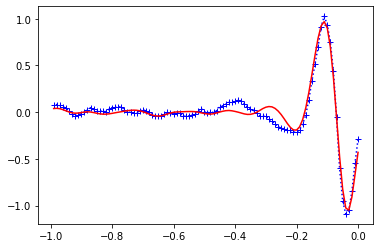

In [9]:
alpha = 40. #1/sec
beta =  1.2
Kg = 1100
tau_y = 0.08
Amp = 1
popt,pcov = curve_fit(NGDcSTA, x, cSTA, p0=[alpha, beta, Kg, tau_y, Amp])
print(popt)
plt.plot(taxis, cSTA, 'b+:', label='data')
plt.plot(taxis, NGDcSTA(x, *popt), 'r-', label='fit')

In [10]:
name_list = ['alpha', 'beta', 'Kg', 'tau_y', 'Amp']
para_dict = {}
for l in range(len(popt)):
    para_dict[name_list[l]] = popt[l]
para_dict

{'alpha': 33.4415975700206,
 'beta': 2.918625020548597,
 'Kg': 999.8279885147381,
 'tau_y': 0.011249991760889458,
 'Amp': 1.2131395983786788}